<a href="https://colab.research.google.com/github/shimohiro/EU_M_Math-Repository/blob/master/Chapter_%E2%85%A4_2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

%precision 3

'%.3f'

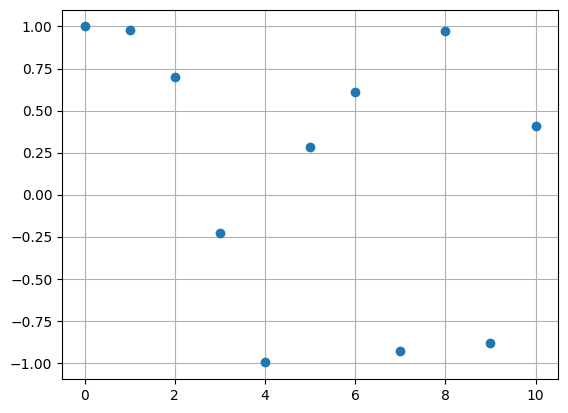

In [2]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

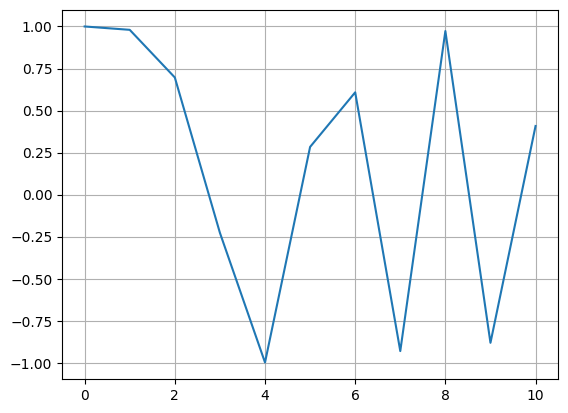

In [3]:
from scipy import interpolate

f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

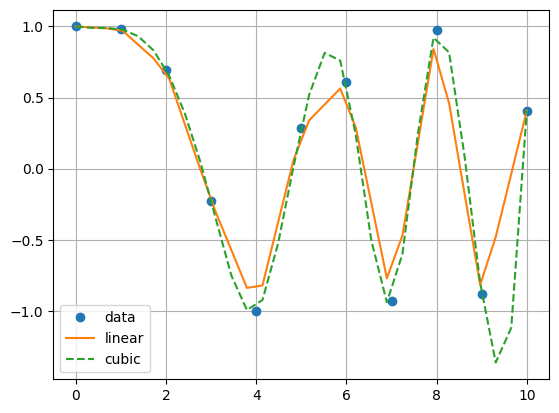

In [4]:
f2 = interpolate.interp1d(x, y,'cubic')
xnew = np.linspace(0, 10, num=30, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

In [5]:
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])

U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)

print('U.S.V* = \n',U@S@Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [6]:
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

(LU,piv) = sp.linalg.lu_factor(A)
L = np.identity(5) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]

x = sp.linalg.lu_solve((LU,piv),b)
x

array([-3.,  4.,  4.,  4.,  4.])

In [7]:
A = np.array([[7, -1, 0, 1],
              [-1, 9, -2, 2],
              [0, -2, 8, -3],
              [1, 2, -3, 10]])
b = np.array([5, 20, 0, 20])

L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)

print(x)

[0.758 2.168 1.241 1.863]


In [8]:
np.dot(A,x)

array([5.000e+00, 2.000e+01, 3.553e-15, 2.000e+01])

In [9]:
from sklearn.decomposition import NMF

X = np.array([[1,1,1], [2,2,2],[3,3,3],[4,4,4]])

model = NMF(n_components=2, init='random', random_state=0)

W = model.fit_transform(X)
H = model.components_
W

array([[0.425, 0.222],
       [0.698, 0.537],
       [0.039, 1.434],
       [2.377, 0.463]])

In [10]:
H

array([[1.281, 1.281, 1.282],
       [2.058, 2.058, 2.058]])

In [11]:
np.dot(W, H)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

In [12]:
from scipy import integrate
import math

In [13]:
def calcPi(x):
    return 4/(1+x**2)

In [14]:
integrate.quad(calcPi, 0, 1)

(3.142, 0.000)

In [15]:
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.142, 0.000)

In [16]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

(2.000, 0.000)

In [17]:
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)
print('n=1の時：',I(1))
print('n=2の時：',I(2))
print('n=3の時：',I(3))
print('n=4の時：',I(4))

n=1の時： (1.0000000000048965, 6.360750360104306e-08)
n=2の時： (0.4999999999985751, 1.3894083651858995e-08)
n=3の時： (0.33333333325010883, 1.3888461883425516e-08)
n=4の時： (0.2500000000043577, 1.2983033469368098e-08)


In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

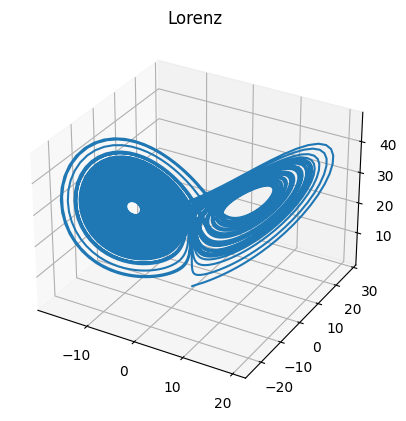

In [19]:
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(lorenz_func, v0, t, args=(p, r, b))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')#教科書のままだと描画できなかったため、fig.add_subplotを使用した。
ax.plot(v[:, 0], v[:, 1], v[:, 2])

plt.title('Lorenz')
plt.grid(True)

In [21]:
from scipy.optimize import fsolve

In [22]:
def f(x):
    y = 2 * x**2 + 2 * x - 10
    return y

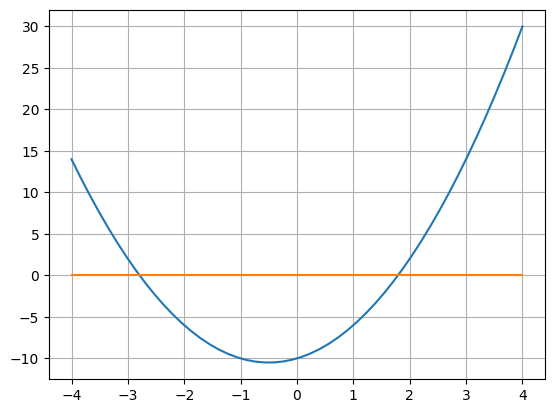

In [23]:
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

In [24]:
x = fsolve(f,2)
print(x)

[1.791]


In [25]:
x = fsolve(f,-3)
print(x)

[-2.791]


In [26]:
from scipy.optimize import minimize

In [27]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3


In [28]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

x0 = [1,5,5,1]
print(objective(x0))

16


In [29]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
cons = [con1,con2]

In [32]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.014017245446883
       x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
     nit: 5
     jac: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
    nfev: 25
    njev: 5


In [33]:
print('Y:',sol.fun)
print('x:',sol.x)

Y: 17.014017245446883
x: [1.    4.743 3.821 1.379]
